# Machine Learning SoSe21 Practice Class

Dr. Timo Baumann, Dr. Özge Alaçcam, Björn Sygo <br>
Email: baumann@informatik.uni-hamburg.de, alacam@informatik.uni-hamburg.de, 6sygo@informatik.uni-hamburg.de

## Exercise 1
**Description:** Implement linear regression with gradient descent <br>
**Deadline:** Saturday, 24. April 2021, 23:59 <br>
**Working together:** You can work in pairs or triples but no larger teams are allowed. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; Please adhere to the honor code discussed in class. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; All members of the team must get involved in understanding and coding the solution.

## Submission: 
**Linus Geewe, Christoph Brauer, Moritz Lahann**

*Also put high-level comments that should be read before looking at your code and results.*

### Goal

1. The goal is to find a function <br>
 $ h_{\theta}(\textbf{x}) = \theta_{0} + \theta_{1} x^{(1)}  + \theta_{2} x^{(2)} + ... +\theta_{D}x^{(D)} $ <br>
that approximates the function $sin(2 \pi)$ based on some $m$ training observations.

2. Our model is a polynomial model, i.e., we use a polynomial function where $x^{j}$ is the $j$'th feature of $x$.

3. You will also need to compute the root mean squared error of your model as compared to the desired outcomes in your $m$ training samples:<br>
$E_{RMS}= \sqrt{2E(\theta)/m}$, where<br>
$E(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 $ is the model's squared error over all training samples.

In [51]:
import math
import matplotlib.pyplot as plt
import random

### Generate your training samples

**Task 1** (10%):  Generate $m$ artificial data points $(x_{i}; y_{i})$ where each $x_i$ is randomly generated from the interval [0,1] and
$y_{i} = sin(2 \pi x_{i}) + \varepsilon $. Here, $\varepsilon$ is a random noise value in the interval [-0.3; 0.3].

Plot your data.

In [52]:
def sin_with_randomness(x):
    return math.sin(2 * math.pi * x) + random.uniform(-0.3, 0.3)

def generate_datapoints(amount):
    random_x = [random.uniform(0, 1) for _ in range(amount)]
    random_y = [sin_with_randomness(x) for x in random_x]
    return random_x, random_y

    

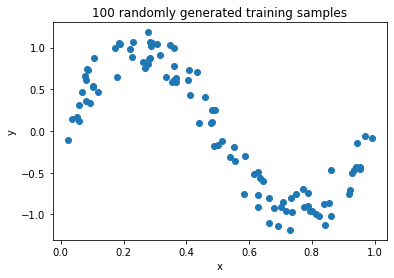

In [53]:
m = 100
x, y = generate_datapoints(m)

plt.scatter(x, y)
plt.title(f"{m} randomly generated training samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

Here, we generate 100 datapoints and plot them. They follow a sin curve with some variance due to the epsilon term.

### Define your initial values

**Task 2** (5%): Define your initial learning rate constant $\alpha$.

Also define your polynomial degree $D$ and create the initial polynomial parameters $\theta_i$. These should be randomly generated in the interval [-0.5,0.5].

In [54]:
alpha = 0.001
degree = 5
m = 100


We define the parameters here using the default values suggested below.

In [55]:
def initial_params(degrees):
    params = [random.uniform(-0.5, 0.5) for _ in range(degrees)]
    return params



In [56]:
initial_params(5)

[0.4205488357935572,
 -0.1725233417213461,
 0.34050467975963694,
 0.4840376964413624,
 -0.22226073777383837]

We begin with five parameters set randomly in the given interval for demonstration.


### Stochastic Gradient Descent

Loop {<br>
&emsp;    for $i:=1$ to $m$ { <br>
&emsp;&emsp;        $\theta_j := \theta_j + \alpha[y_i - h_{\theta}(x_i)](x_i)_{(j)} $ (for every j)<br>
&emsp;    }<br>
}

where:

* $i$ is an index defined over the number of data points, from $i=1$ to $m$
* $j$ is an index defined over the terms of the polynomial, from $j=0$ to $j=D$
* The last factor $(x_i)_{(j)}$ means: the factor multiplying parameter $\theta_j$ in the polynomial function, which in this case will be $x_i$ to the power of $j$.
* loop for a given number of *epochs*; you may need a large number of epochs to get a good fit (e.g. 10000).

**Task 3** (40%):  Implement in Python the Stochastic Gradient Descent algorithm to solve the regression problem using the datapoints you generated.

In [57]:
# our h_theta(x_i)
def hypothesis(x, params):
    sum = 0
    for param_index, param in enumerate(params):
        sum += param * (x ** param_index)
    
    return sum

# update step for stochastic gradient descent: parameters updated for every sample
def update_step(x, y, params, learning_rate):
    updated_params = []
    for param_index, param in enumerate(params):
        updated_params.append(param + (learning_rate * (y - hypothesis(x, params)) *  (x ** param_index)))

    return updated_params

# the entire training loop over a number of epochs
def training_loop(x_samples, y_targets, params, learning_rate, nr_epochs):
    new_params = params
    for epoch in range(nr_epochs):
        for x, y in zip(x_samples, y_targets):
            new_params = update_step(x, y, new_params, learning_rate)

    return new_params



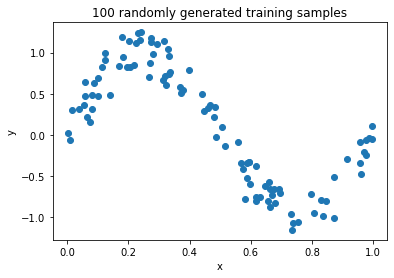

Initial parameters: [0.02788969867749913, 0.35334555264266376, -0.06967553996626896, -0.004186721209840649, 0.4148813881908606]
Learned parameters: [0.08380863090293147, 7.468130715890688, -15.994367878027585, -3.9148687640805133, 12.59089190409837]


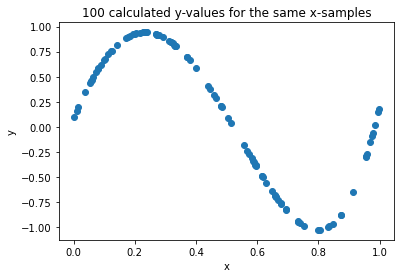

In [58]:
alpha = 0.01
#degree 5 -> funktion 4. Grades
degree = 5
m = 100
nr_epochs = 10000

samples_x, samples_y = generate_datapoints(m)

plt.scatter(samples_x, samples_y)
plt.title(f"{m} randomly generated training samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

start_params = initial_params(degree)
print(f"Initial parameters: {start_params}")

new_params = training_loop(samples_x, samples_y, start_params, alpha, nr_epochs)
print(f"Learned parameters: {new_params}")

guessed_y = [hypothesis(x, new_params) for x in samples_x]
plt.scatter(samples_x, guessed_y)
plt.title(f"{m} calculated y-values for the same x-samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()


## Training with default values

Above, we run our training loop with the suggested default values. We observe a significant change in our parameters (thetas), which we expect should result in our model fitting the underlying data somewhat well.

We test this by plotting the predicted y values of our model for the initially used x values - our learned parameters model a sin wave.
The model does not learn the large amount of variance present in the training data. This is a good thing, as we typically want to model underlying relationships in data free from noise.

**Task 4** (15%): Implement the root mean squared error metric to measure the performance of your polynomial model wrt. your data.

In [59]:
def error_rms(x_samples, y_samples, model_params):
    sum = 0
    for x, y in zip(x_samples, y_samples):
        sum += (hypothesis(x, model_params) - y) ** 2

    return math.sqrt(2 * 0.5 * sum / len(x_samples))


print(error_rms(samples_x, samples_y, new_params))

0.1756856106816635


### Training a model

**Task 5** (15%): Train a polynomial model using your artifically created data; take note of the error of your model over the course of the training epochs. 

Plot (in one plot, using different colors): 
1. the data points, 
2. the original sine function, and 
3. the learned polynomial function.

Plot a second graph showing the error curve. It should clearly illustrate how the error of your model decreases as the number of iterations increases.

Report the parameters of the model.

In [60]:
def training_loop_error(x_samples, y_targets, params, learning_rate, nr_epochs):
    new_params = params
    errors = []
    for epoch in range(nr_epochs):
        for x, y in zip(x_samples, y_targets):
            new_params = update_step(x, y, new_params, learning_rate)
        errors.append(error_rms(x_samples, y_targets, new_params))

    return new_params, errors

We write a new training loop that allows us to record the RMSE after every epoch.


In [61]:
# function to gather points for plotting the ideal sin function without the error used for generating our training data
def sinus_datapoints():
    x = []
    y = []
    # interval 0 to 1
    for i in range(0, 100):
        x.append(i/100)
        y.append(math.sin(2 * math.pi * i/100))

    
    return x, y

# function to plot the learned function of our data
def learned_function_datapoint(params):
    x = []
    y = []
    # interval 0 to 1
    for i in range(0, 100):
        x.append(i/100)
        y.append(hypothesis(i/100, params))

    
    return x, y

# function for plotting RMSE over time
def error_plot(nr_epochs, errors):
    time = list(range(nr_epochs))
    plt.plot(time, errors)
    plt.title("Root Mean Square Error over time")
    plt.show()

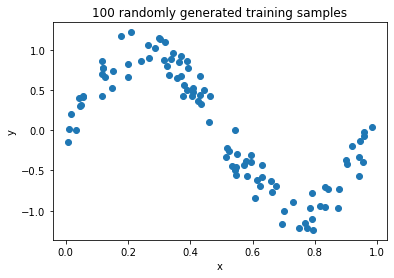

Initial parameters: [-0.3285359437189316, 0.1892793738006746, 0.1748497558081037, 0.4727224576480924, 0.15973983253728463]
Learned parameters: [0.0049997509869846735, 7.977586604836484, -17.19450458849404, -4.123202087167206, 13.84310497927203]


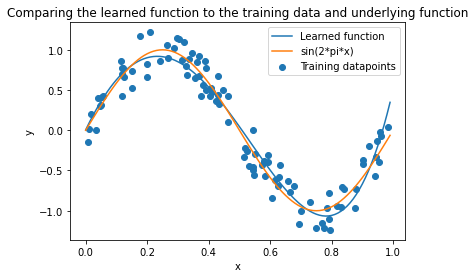

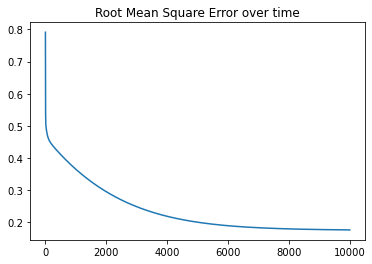

learning rate: 0.01, number of thetas = 5, epochs = 10000, samples = 100
final RMSE: 0.17579945210968884


In [62]:
alpha = 0.01
#degree 5 -> funktion 4. Grades
degree = 5
m = 100
nr_epochs = 10000

samples_x, samples_y = generate_datapoints(m)

plt.scatter(samples_x, samples_y)
plt.title(f"{m} randomly generated training samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

start_params = initial_params(degree)
print(f"Initial parameters: {start_params}")

new_params, errors = training_loop_error(samples_x, samples_y, start_params, alpha, nr_epochs)


print(f"Learned parameters: {new_params}")
guessed_y = [hypothesis(x, new_params) for x in samples_x]

x_learned, y_learned = learned_function_datapoint(new_params)
x_sinus, y_sinus = sinus_datapoints()

plt.plot(x_learned, y_learned, label = "Learned function") #gelernte Funktion
plt.scatter(samples_x, samples_y, label="Training datapoints") #sample Werte
plt.plot(x_sinus, y_sinus, label = "sin(2*pi*x)") #sinus Werte


plt.title("Comparing the learned function to the training data and underlying function")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

error_plot(nr_epochs, errors)


print(f"learning rate: {alpha}, number of thetas = {degree}, epochs = {nr_epochs}, samples = {m}")
print(f"final RMSE: {errors[-1]}")

## Training with more detailed plotting

We repeat the training with the default values and plotting additional information.
Clearly, our learned function (in blue) is quite close to the sin function. There are differences, which could be attributed to two factors. 

1. Our model may have needed to learn for longer. This is unlikely though. As the RMSE plot shows, there is a sharp decrease in error during the first few epochs, followed by a gradually slowing decline. At our 10000 epochs, the change in error with each epoch is very small, so further learning would not make our model much closer to the pure function.

2. The variance used in the generation of the training data skews our model. The training datapoints themselves deviate from the sin curve quite strongly in some points, so of course our model would be influenced by this. It learns from the datapoints with their imperfections, not the underlying function.

### Experiment with the meta-parameters

**Task 6** (15%): Try different values for $\alpha$, $D$, $m$, and the number of epochs to investigate their effect on the learning process.

Report how the model performance is influenced by changes to each of the meta-parameters and discuss your findings.

In [63]:
# The values we choose here are of course somewhat arbitrary, but we try to cover a wide range of possibilities (extremes in both directions)
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.9]
nr_thetas = [2, 3, 4, 5, 10]
nr_samples = [10, 25, 50, 250, 1000]
nr_epochs = [1, 10, 100, 20000]

def experiment(learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000):
    samples_x, samples_y = generate_datapoints(nr_samples)
    start_params = initial_params(nr_thetas)
    new_params, errors = training_loop_error(samples_x, samples_y, start_params, learning_rate, nr_epochs)
    error_plot(nr_epochs, errors)
    print(f"final rms-error: {errors[-1]}")

    return new_params

Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000
--------------------------------------


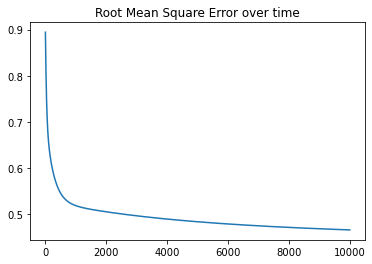

final rms-error: 0.46529115831723183
learning rate: 0.0001
--------------------------------------


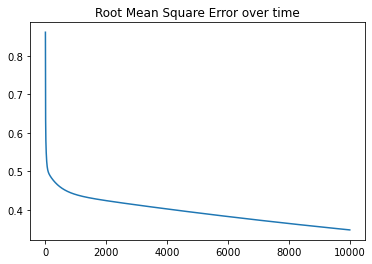

final rms-error: 0.34746220174566805
learning rate: 0.001
--------------------------------------


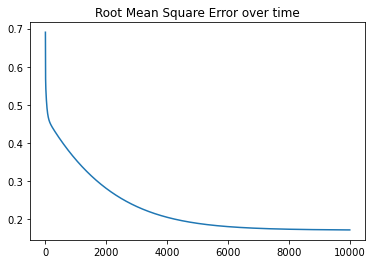

final rms-error: 0.17267150846553667
learning rate: 0.01
--------------------------------------


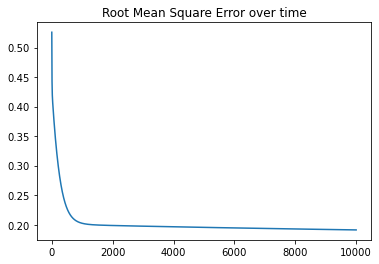

final rms-error: 0.1911012522980565
learning rate: 0.1
--------------------------------------


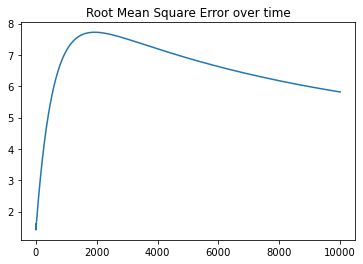

final rms-error: 5.817285283874633
learning rate: 0.9
--------------------------------------


In [64]:
###Learning rates
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")
print("--------------------------------------")

for lr in learning_rates:
    experiment(learning_rate = lr)
    print(f"learning rate: {lr}")
    print("--------------------------------------")

## Learning Rate Experiments

Changing the learning rate drastically effects how long it takes the model to converge. The tradeoff for speed is accuracy.

A learning rate of 0.9 causes the parameter changes to be quite large. It should also result in a high lower bound for the error - the rate is too high so the gradient descent will most likely step over the global minimum and can't reach it.

At the other end, a learning rate of 0.0001 even after 10000 epochs has not converged yet, though it should at the end deliver a lower final error. We report the best results for pretty high learning rates, 0.01 and 0.1. A LR of 0.1 converges very quickly, after less than a thousand epochs.

Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000
--------------------------------------


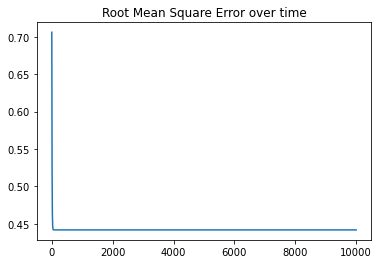

final rms-error: 0.44177111377526246


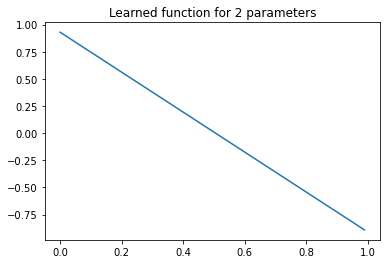

--------------------------------------


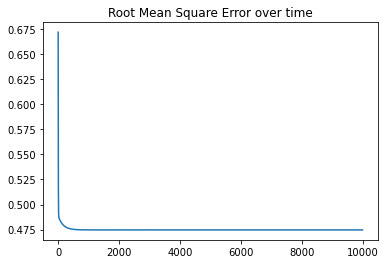

final rms-error: 0.47472395183725447


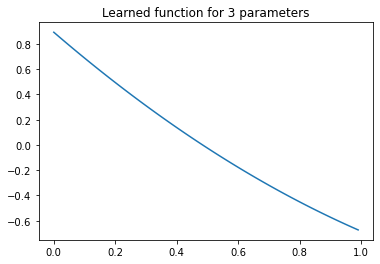

--------------------------------------


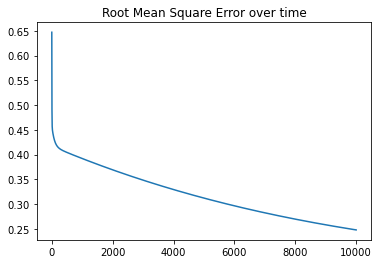

final rms-error: 0.2481122078068562


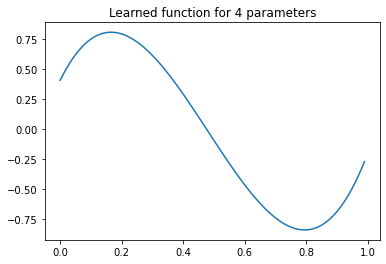

--------------------------------------


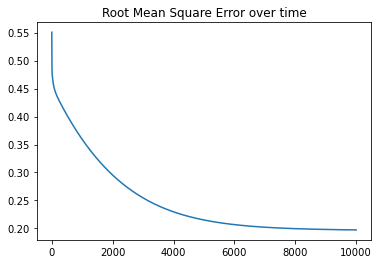

final rms-error: 0.19741957029784157


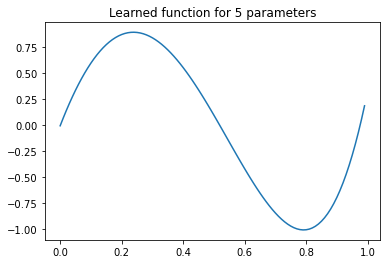

--------------------------------------


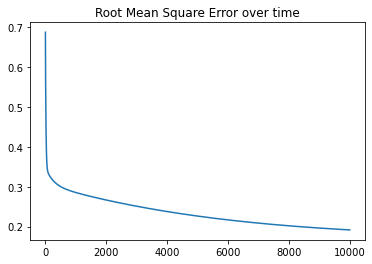

final rms-error: 0.19180763960523753


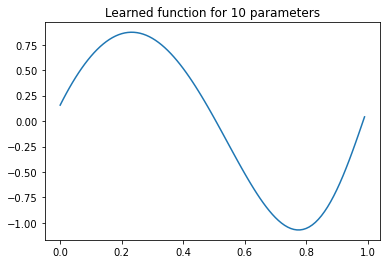

--------------------------------------


In [65]:
# Number of Parameters
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")
print("--------------------------------------")

for nr in nr_thetas:
    thetas = experiment(nr_thetas = nr)
    
    x_learned, y_learned = learned_function_datapoint(thetas)
    x_sinus, y_sinus = sinus_datapoints()

    plt.plot(x_learned, y_learned, label = "Learned function")
    plt.title(f"Learned function for {nr} parameters")
    plt.show()
    print("--------------------------------------")

## Number of parameters experiments

To plot a sin wave, a third degree function is needed. That means 4 thetas are required (interecept parameter). The results here support this, starting from 4 parameters our learned function models a sin wave. Interestingly, 3 parameters stays a linear function, though a parabola would be possible. A linear function had less error in this case.

With 5 parameters, the model converges faster (and possible has a lower final error). The final error should decrease with increasing number of parameters, but there is a point of diminishing returns. 4 parameters is enough to model the underlying function, far past that and the model begins to overfit.

Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000
--------------------------------------


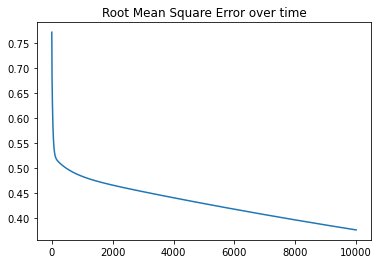

final rms-error: 0.3769381585253637
RMSE for 100 samples: 0.3589013571373352
number of samples used in training: 10
--------------------------------------


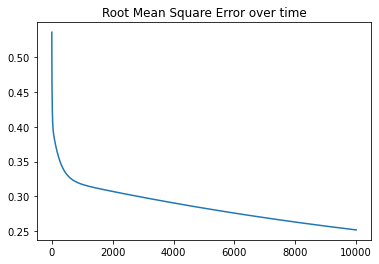

final rms-error: 0.25178744331875624
RMSE for 100 samples: 0.30908654588137385
number of samples used in training: 25
--------------------------------------


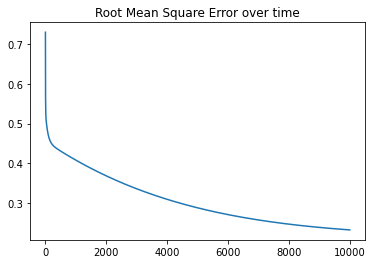

final rms-error: 0.23157468347393348
RMSE for 100 samples: 0.2415317741525825
number of samples used in training: 50
--------------------------------------


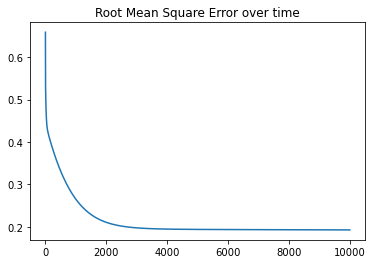

final rms-error: 0.19292773280035114
RMSE for 100 samples: 0.21869105518967538
number of samples used in training: 250
--------------------------------------


KeyboardInterrupt: 

In [66]:
###Number of Samples
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")
print("--------------------------------------")
for nr in nr_samples:
    thetas = experiment(nr_samples = nr)

    x_samples, y_samples = generate_datapoints(100)
    print(f"RMSE for 100 samples: {error_rms(x_samples, y_samples, thetas)}")
    print(f"number of samples used in training: {nr}")
    print("--------------------------------------")

## Number of samples experiments

A lower amount of samples makes our model converge more slowly. This is due to the fact that this is SGD, so with less samples there are less updates to the weights each epoch. Since the underlying sin function is quite simple, it only requires few datapoints for our model to learn it quite closely. With a more complex dataset, less samples would heavily limit our accuracy.

Again, there is a point of diminishing returns: more and more samples will not increase accuracy.

Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000
--------------------------------------


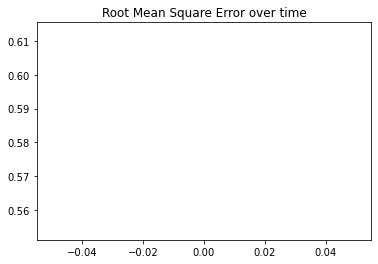

final rms-error: 0.58336683688502
number of epochs: 1
--------------------------------------


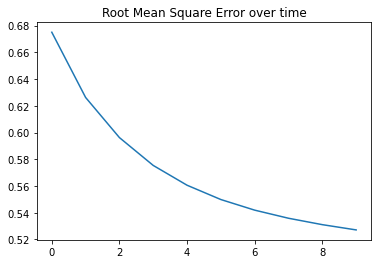

final rms-error: 0.5271295472846377
number of epochs: 10
--------------------------------------


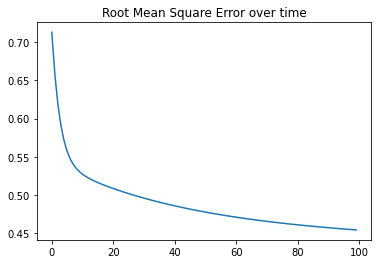

final rms-error: 0.45437855553791323
number of epochs: 100
--------------------------------------


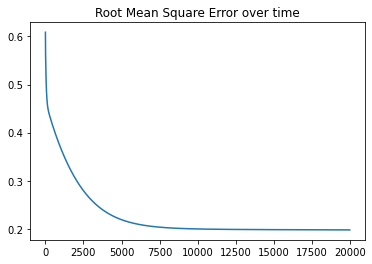

final rms-error: 0.1977838783880054
number of epochs: 20000
--------------------------------------


In [43]:
###Number of Epochs
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")
print("--------------------------------------")
for nr in nr_epochs:
    experiment(nr_epochs = nr)
    print(f"number of epochs: {nr}")
    print("--------------------------------------")

## Number of epochs experiment

Essentially we are looking at a zoomed in (or out) graph of our default parameter experiment. We can see that the highest gains in performance are made in the first 5-10 epochs. As we already saw convergence with 10000 epochs, having more than that will not improve the model by a noticeable amount. At only 1000 (or less), the model has not converged yet. With our default parameters, 8000 - 10000 epochs seems sufficient.

# Conclusion

All the parameters interact with each other. A lower learning rate will require more epochs until convergence and vice versa. More parameters and more training samples may slightly improve accuracy, at the cost of a lot of performance.

This is a tradeoff typical to the field of machine learning. In many cases, higher accuracy requires longer computation time and/or more samples.

In the end, tuning of hyperparameters can be done ad nauseum. There is a degree of randomness involved as well, due to the random initial weights. However, getting the hyperparameters in the right ballpark is crucial for performance.

```python
alpha = 0.01
D = 5
m = 100
nr_epochs = 10000
```

These are reasonable values to use (learning rate factor 10 higher than recommended) as they achieve very good results in 10000 epochs. We suspect the lower bound for the RMSE to be around 0.17 due to the epsilon term in the generated datapoints (unless the model is overfitting), so the final error for this configuration of ~0.173 is a good result. Increasing degrees and learning rate lower training time, which is desirable when there are time constraints.

### Hint

A good initial value for $m$ is 100. You can also simply use a function that each time it is called generates a new point from the distribution above, i.e., you set $m$ to $\infty$; in that case you must of course limit the number of samples chosen per iteration (how about 1?) and for evaluating the model (something >1).

A good initial value for $D$ is 5.

A good initial value for $\alpha$ is 0.001.

### Report Submission

Prepare a report of your solution as a commented Jupyter notebook (using markdown for your results and comments); include figures and results.
If you must, you can also upload a PDF document with the report annexed with your Python code.

Upload your report file to the Machine Learning Moodle Course page. Please make sure that your submission team corresponds to the team's Moodle group that you're in.